In [1]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import math as ma
from scipy.interpolate import interp1d
from scipy.stats.stats import pearsonr
from scipy.optimize import leastsq
from matplotlib.ticker import ScalarFormatter
import os
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'C:\Users\RufusTurner\Documents\Python Scripts\Python Scripts\Continuous Improvement\Apr 2022\Rob_1.csv')

In [3]:
df1.head(10)

,Pore id,Sanitised pore id,XML filenames,IDFS filenames,IDFS paths,VCAX filenames,source_file,np_type,Pressure,mrp,...,asymmetry_50_mean,asymmetry_50_std,asymmetry_50_median,asymmetry_50_skewness,asymmetry_50_kurtosis,prominence_mean,prominence_std,prominence_median,prominence_skewness,prominence_kurtosis
0,A81200,A81200,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220324133717_A81200 47 10 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220324133717_A81200 47 10 100_46.99(mm)_1000(P...,2022\March\MRP Week 13.csv,Internal,1000.0,105.0,...,3.392040,1.520378,2.897406,1.023797,1.070693,0.141488,0.036202,0.142658,-0.315967,0.981921
1,A81200,A81200,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220324133815_A81200 47 p0 100_46.99(mm)_0(Pa)_...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220324133815_A81200 47 p0 100_46.99(mm)_0(Pa)_...,2022\March\MRP Week 13.csv,Internal,0.0,93.0,...,4.339146,1.277641,4.077107,0.897970,0.803470,0.218948,0.045677,0.219669,0.269599,5.747254
2,A81095,A81095,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318134124_A81095 47 10 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318134124_A81095 47 10 100_46.99(mm)_1000(P...,2022\March\MRP Week 12.csv,NP100,1000.0,114.0,...,2.095567,1.082172,1.762251,1.018783,0.482688,0.098776,0.040783,0.096767,0.043170,-0.219520
3,A81095,A81095,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318134159_A81095 47 10 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318134159_A81095 47 10 100_46.99(mm)_1000(P...,2022\March\MRP Week 12.csv,NP100,0.0,88.0,...,2.499436,0.639091,2.369119,0.760027,0.183484,0.241638,0.035424,0.241219,0.019916,-0.506888
4,A81115,A81115,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220321114532_A81115 47 p0 100_46.99(mm)_0(Pa)_...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220321114532_A81115 47 p0 100_46.99(mm)_0(Pa)_...,2022\March\MRP Week 13.csv,NP100,0.0,93.0,...,1.985033,0.518151,1.938346,0.660083,0.952682,0.230708,0.037300,0.226143,0.547115,0.549276
5,A81115,A81115,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220321114500_A81115 47 10 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220321114500_A81115 47 10 100_46.99(mm)_1000(P...,2022\March\MRP Week 13.csv,NP100,1000.0,114.0,...,1.862518,0.920734,1.613851,1.273892,1.648910,0.112304,0.036944,0.107452,0.390262,-0.154868
6,A81096,A81096,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318135650_A81096 47 10 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318135650_A81096 47 10 100_46.99(mm)_1000(P...,2022\March\MRP Week 12.csv,NP100,1000.0,104.0,...,1.632487,0.771813,1.446341,1.237543,1.913431,0.136437,0.051904,0.133514,0.166658,-0.166791
7,A81096,A81096,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318135758_A81096 47 p0 100_46.99(mm)_1000(P...,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,220318135758_A81096 47 p0 100_46.99(mm)_1000(P...,2022\March\MRP Week 12.csv,NP100,0.0,83.0,...,1.850698,0.463358,1.792577,0.686269,0.165374,0.297442,0.051287,0.296982,0.135574,0.020520
8,B06090,B06090,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,NaN,NaN,NaN,2022\March\MRP Week 12_Misc MRP Tests.csv,NP100,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,B06090,B06090,\\10.0.0.1\izondata\RND_nanopore_improvement\P...,NaN,NaN,NaN,2022\March\MRP Week 12_Misc MRP Tests.csv,NP100,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Pore id                                  150 non-null    object 
 1   Sanitised pore id                        150 non-null    object 
 2   XML filenames                            150 non-null    object 
 3   IDFS filenames                           133 non-null    object 
 4   IDFS paths                               133 non-null    object 
 5   VCAX filenames                           133 non-null    object 
 6   source_file                              144 non-null    object 
 7   np_type                                  146 non-null    object 
 8   Pressure                                 132 non-null    float64
 9   mrp                                      148 non-null    float64
 10  MRP_Change                               130 non-n

In [5]:
df2 = df1.dropna()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 145
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Pore id                                  126 non-null    object 
 1   Sanitised pore id                        126 non-null    object 
 2   XML filenames                            126 non-null    object 
 3   IDFS filenames                           126 non-null    object 
 4   IDFS paths                               126 non-null    object 
 5   VCAX filenames                           126 non-null    object 
 6   source_file                              126 non-null    object 
 7   np_type                                  126 non-null    object 
 8   Pressure                                 126 non-null    float64
 9   mrp                                      126 non-null    float64
 10  MRP_Change                               126 non-n

In [7]:
df3 = df2.drop(['Pore id', 'XML filenames', 'IDFS filenames', 'IDFS paths', 'VCAX filenames'], axis =1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 145
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sanitised pore id                        126 non-null    object 
 1   source_file                              126 non-null    object 
 2   np_type                                  126 non-null    object 
 3   Pressure                                 126 non-null    float64
 4   mrp                                      126 non-null    float64
 5   MRP_Change                               126 non-null    float64
 6   current_47mm_nA                          126 non-null    float64
 7   rms_noise_47mm_pA                        126 non-null    float64
 8   voltage_47mm_V                           126 non-null    float64
 9   particle_rate_47mm_/min                  126 non-null    float64
 10  dI_47mm_nA                               126 non-n

In [8]:
df3.head()

,Sanitised pore id,source_file,np_type,Pressure,mrp,MRP_Change,current_47mm_nA,rms_noise_47mm_pA,voltage_47mm_V,particle_rate_47mm_/min,...,asymmetry_50_mean,asymmetry_50_std,asymmetry_50_median,asymmetry_50_skewness,asymmetry_50_kurtosis,prominence_mean,prominence_std,prominence_median,prominence_skewness,prominence_kurtosis
0,A81200,2022\March\MRP Week 13.csv,Internal,1000.0,105.0,12.0,129.0,10.2,1.5,1610.7,...,3.392040,1.520378,2.897406,1.023797,1.070693,0.141488,0.036202,0.142658,-0.315967,0.981921
1,A81200,2022\March\MRP Week 13.csv,Internal,0.0,93.0,12.0,131.0,9.9,1.5,922.8,...,4.339146,1.277641,4.077107,0.897970,0.803470,0.218948,0.045677,0.219669,0.269599,5.747254
2,A81095,2022\March\MRP Week 12.csv,NP100,1000.0,114.0,26.0,128.0,9.3,0.6,1684.1,...,2.095567,1.082172,1.762251,1.018783,0.482688,0.098776,0.040783,0.096767,0.043170,-0.219520
3,A81095,2022\March\MRP Week 12.csv,NP100,0.0,88.0,26.0,127.0,7.1,0.6,512.0,...,2.499436,0.639091,2.369119,0.760027,0.183484,0.241638,0.035424,0.241219,0.019916,-0.506888
4,A81115,2022\March\MRP Week 13.csv,NP100,0.0,93.0,21.0,135.0,8.8,0.9,726.3,...,1.985033,0.518151,1.938346,0.660083,0.952682,0.230708,0.037300,0.226143,0.547115,0.549276


In [9]:
df3['MRP_Percent_Change'] = df3['MRP_Change']/df3['mrp']*100

In [10]:
df4= df3[df3['Pressure']==1000]
df5= df3[df3['Pressure']==0]

<IPython.core.display.Javascript object>


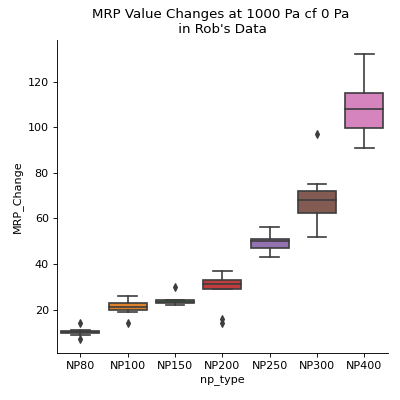

In [11]:
g = sns.catplot(x="np_type", y="MRP_Change",
                 kind="box",order=[
                 'NP80', 'NP100', 'NP150', 'NP200', 'NP250', 'NP300', 'NP400'], data=df4)
g.fig.subplots_adjust(top=0.9)
plt.title("MRP Value Changes at 1000 Pa cf 0 Pa \n in Rob's Data ");

<IPython.core.display.Javascript object>


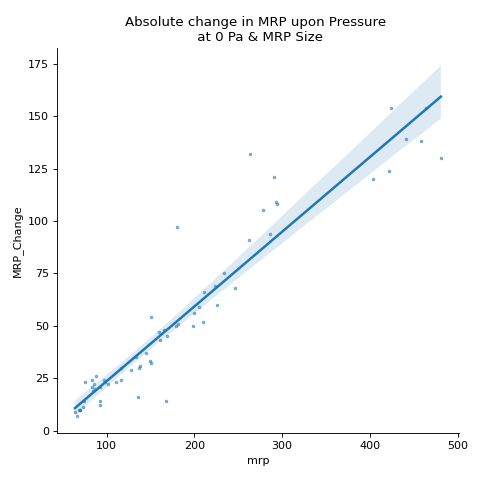

In [12]:
g = sns.lmplot(x='mrp', y='MRP_Change',data=df5, height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.fig.subplots_adjust(top=0.9)
plt.title('Absolute change in MRP upon Pressure \n at 0 Pa & MRP Size')
plt.show()

<IPython.core.display.Javascript object>


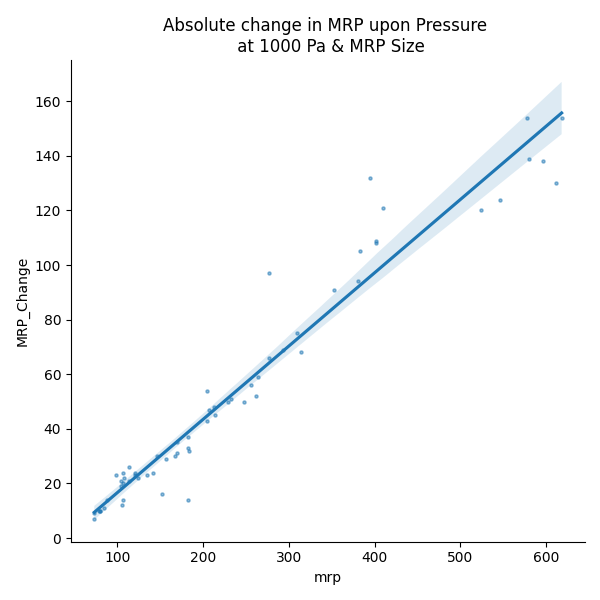

In [14]:
g = sns.lmplot(x='mrp', y='MRP_Change',data=df4, height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.fig.subplots_adjust(top=0.9)
plt.title('Absolute change in MRP upon Pressure \n at 1000 Pa & MRP Size')
plt.show()

<IPython.core.display.Javascript object>


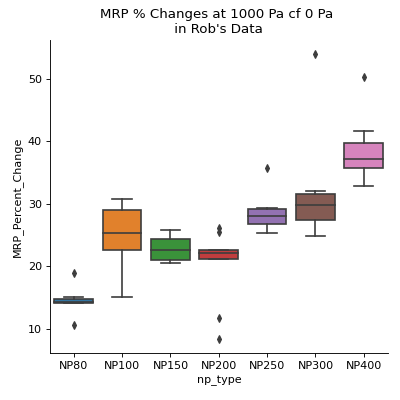

In [13]:
g = sns.catplot(x="np_type", y="MRP_Percent_Change",
                 kind="box",order=[
                 'NP80', 'NP100', 'NP150', 'NP200', 'NP250', 'NP300', 'NP400'], data=df5)
g.fig.subplots_adjust(top=0.9)
plt.title("MRP % Changes at 1000 Pa cf 0 Pa \n in Rob's Data ");

<IPython.core.display.Javascript object>


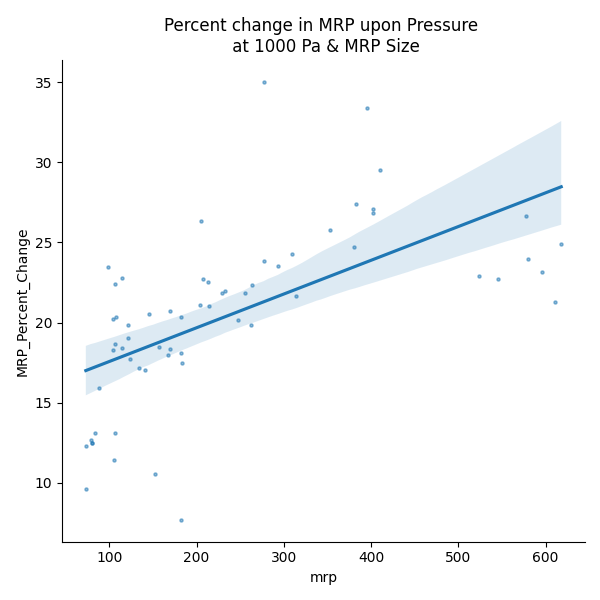

In [16]:
g = sns.lmplot(x='mrp', y='MRP_Percent_Change',data=df4, height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.fig.subplots_adjust(top=0.9)
plt.title('Percent change in MRP upon Pressure \n at 1000 Pa & MRP Size')
plt.show()

<IPython.core.display.Javascript object>


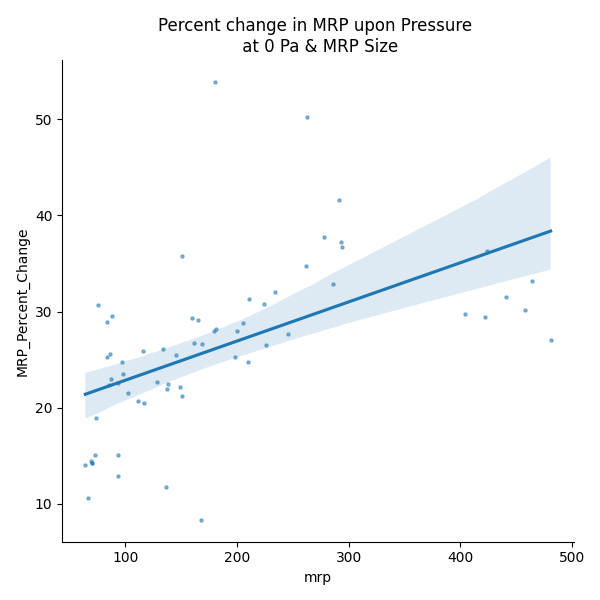

In [17]:
g = sns.lmplot(x='mrp', y='MRP_Percent_Change',data=df5, height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.fig.subplots_adjust(top=0.9)
plt.title('Percent change in MRP upon Pressure \n at 0 Pa & MRP Size')
plt.show()

In [18]:
NP200 = df3[df3['np_type'] == 'NP200']

In [19]:
NP200.columns

Index(['Sanitised pore id', 'source_file', 'np_type', 'Pressure', 'mrp',
       'MRP_Change', 'current_47mm_nA', 'rms_noise_47mm_pA', 'voltage_47mm_V',
       'particle_rate_47mm_/min', 'dI_47mm_nA', 'particle_diameter_nm',
       'g_at_47mm_nS', 'mrp_47mm_nm', 'dI/I_47mm', '45/47_factor',
       'particle_raw_concentration_particles/ml', 'particle_dilution_factor',
       'width_85_mean', 'width_85_std', 'width_85_median', 'width_85_skewness',
       'width_85_kurtosis', 'asymmetry_85_mean', 'asymmetry_85_std',
       'asymmetry_85_median', 'asymmetry_85_skewness', 'asymmetry_85_kurtosis',
       'width_50_mean', 'width_50_std', 'width_50_median', 'width_50_skewness',
       'width_50_kurtosis', 'asymmetry_50_mean', 'asymmetry_50_std',
       'asymmetry_50_median', 'asymmetry_50_skewness', 'asymmetry_50_kurtosis',
       'prominence_mean', 'prominence_std', 'prominence_median',
       'prominence_skewness', 'prominence_kurtosis', 'MRP_Percent_Change'],
      dtype='object')

<IPython.core.display.Javascript object>


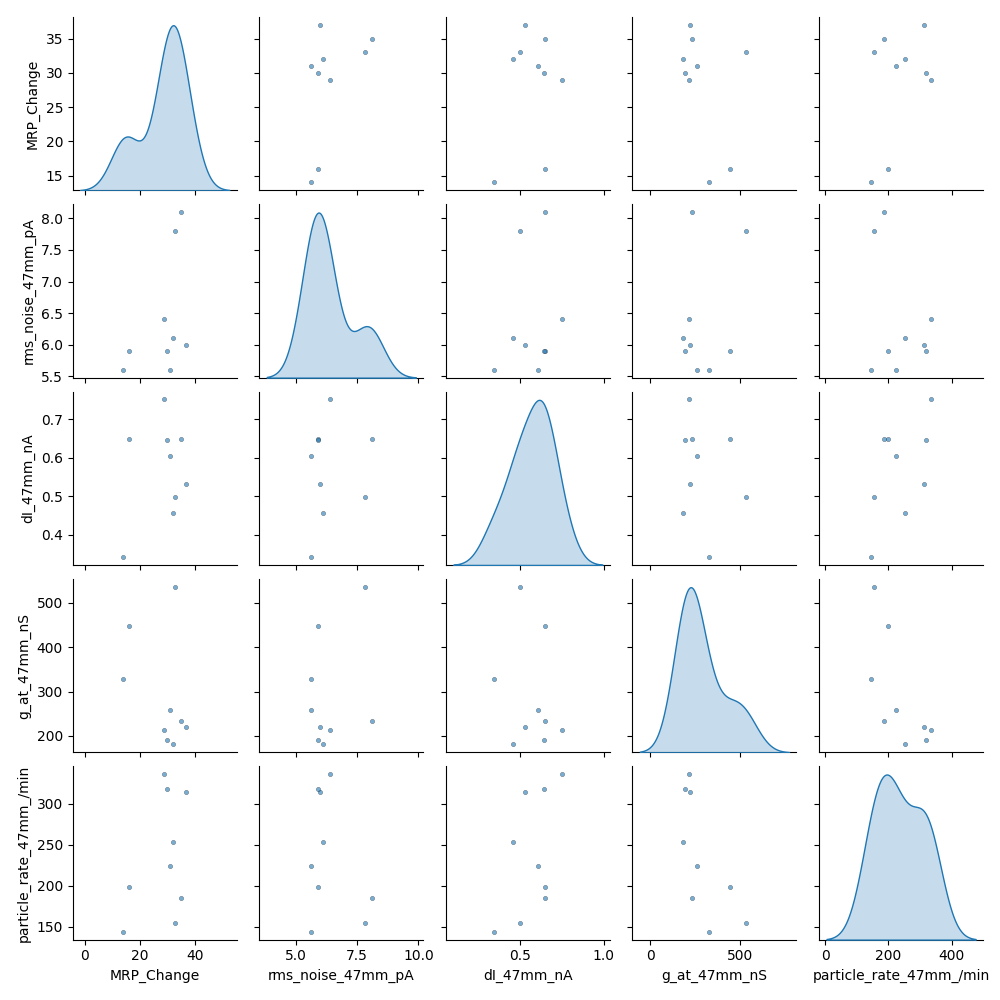

In [20]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'rms_noise_47mm_pA', 'dI_47mm_nA', 'g_at_47mm_nS',  'particle_rate_47mm_/min'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


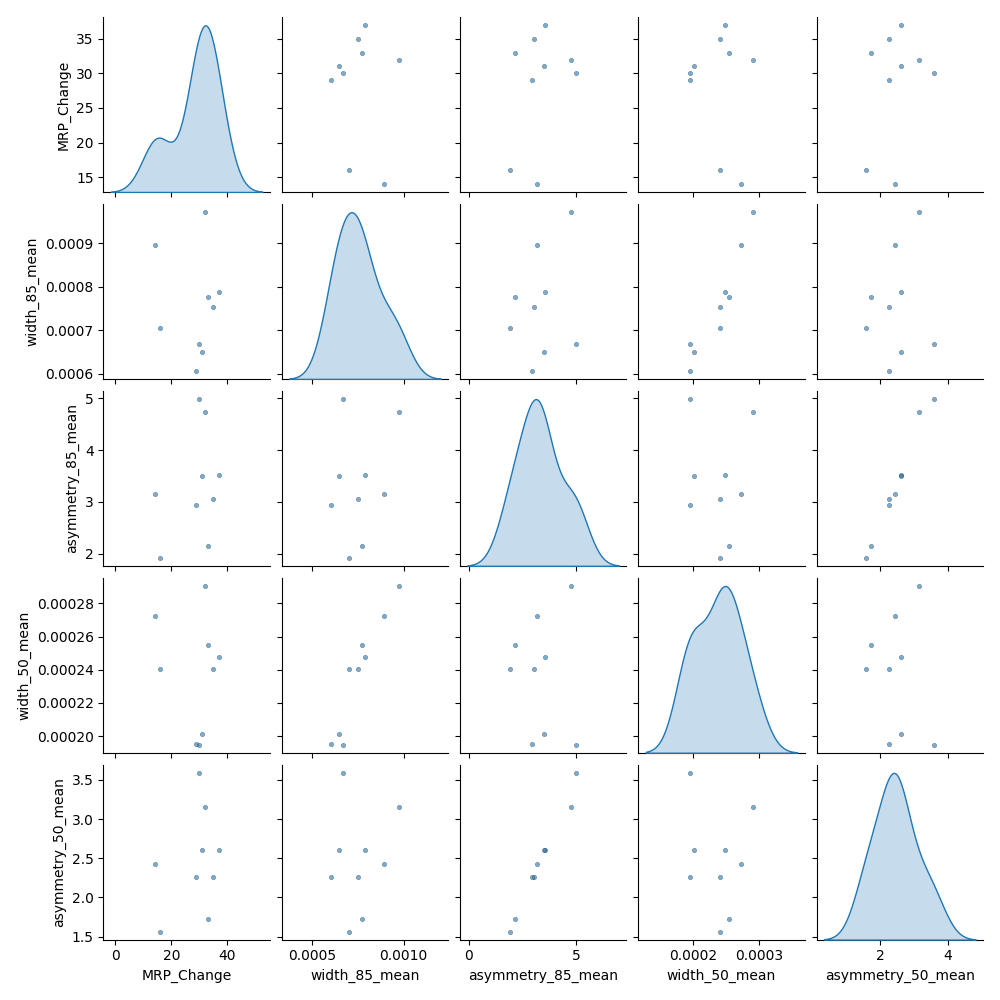

In [21]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'width_85_mean', 'asymmetry_85_mean', 'width_50_mean',  'asymmetry_50_mean'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


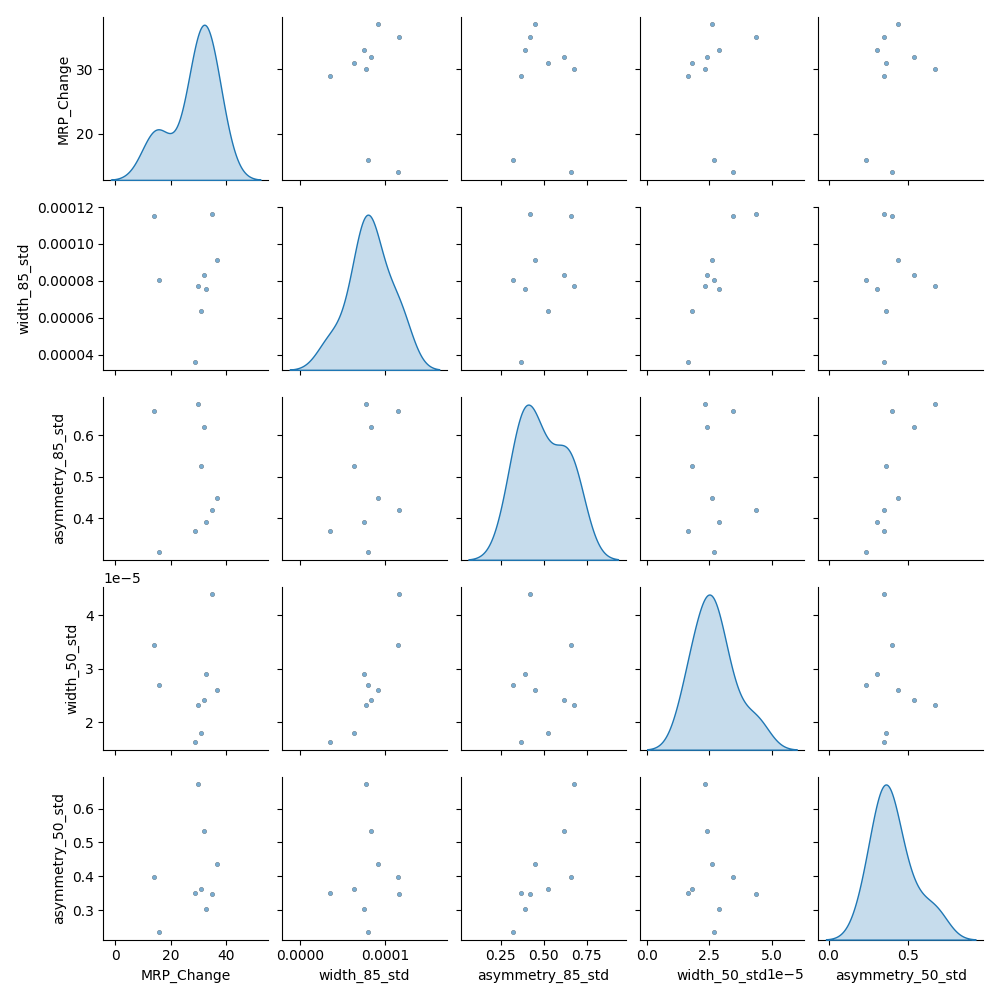

In [22]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'width_85_std', 'asymmetry_85_std', 'width_50_std',  'asymmetry_50_std'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


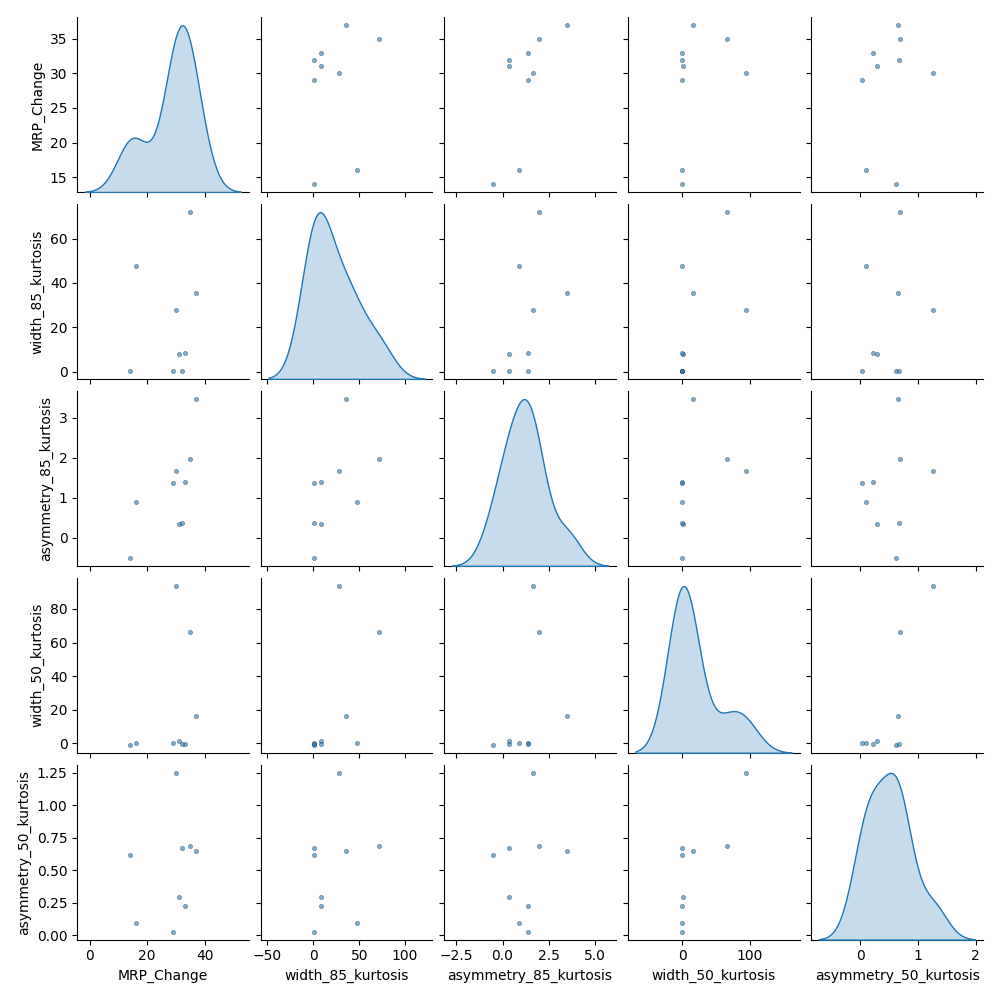

In [23]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'width_85_kurtosis', 'asymmetry_85_kurtosis', 'width_50_kurtosis',  'asymmetry_50_kurtosis'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


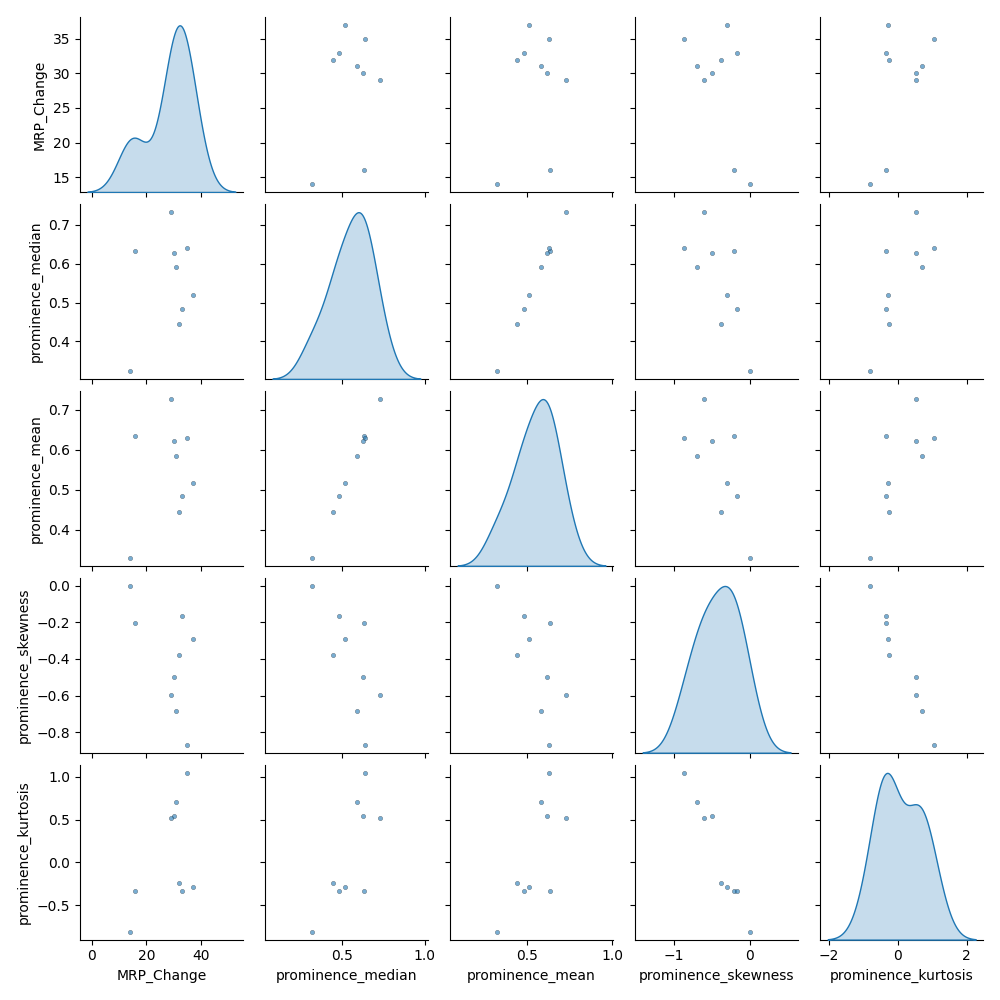

In [24]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'prominence_median', 'prominence_mean',  'prominence_skewness','prominence_kurtosis'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


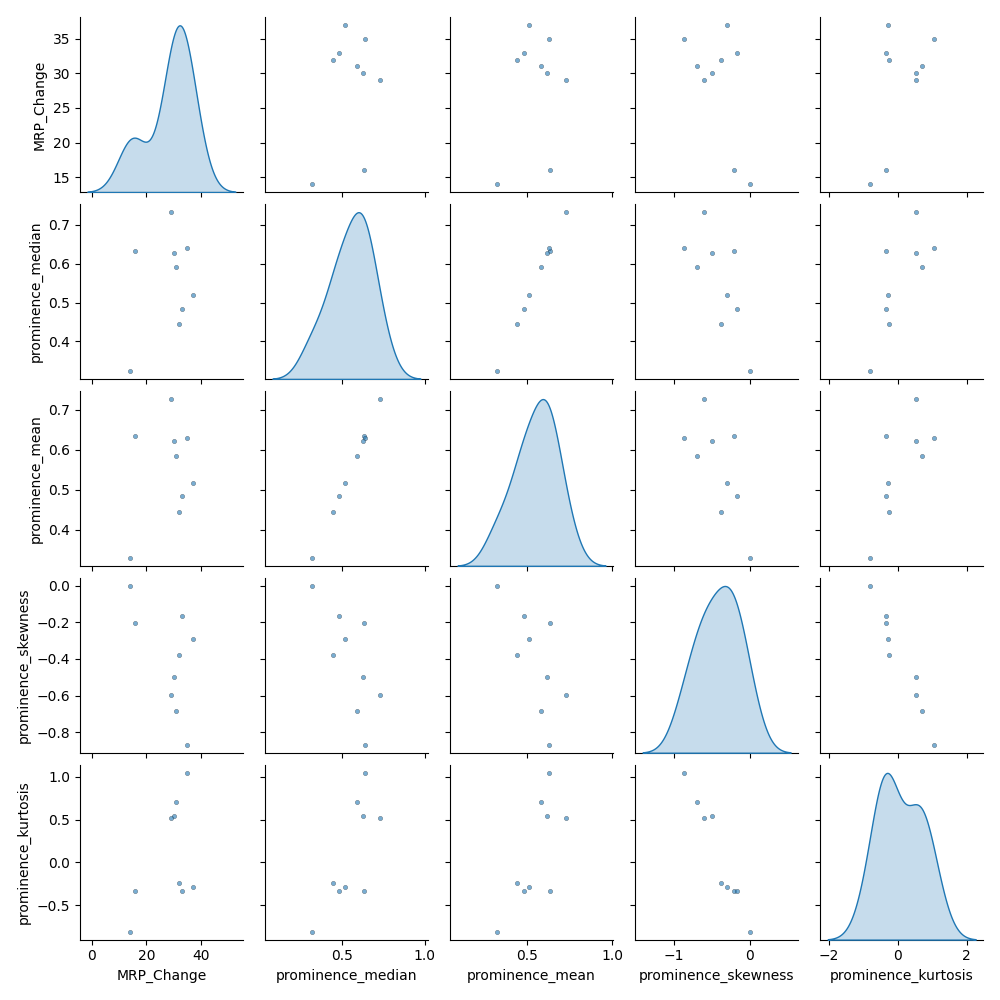

In [25]:
sns.pairplot(NP200[NP200['Pressure'] == 0], 
             vars = ['MRP_Change', 'prominence_median', 'prominence_mean',  'prominence_skewness','prominence_kurtosis'], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


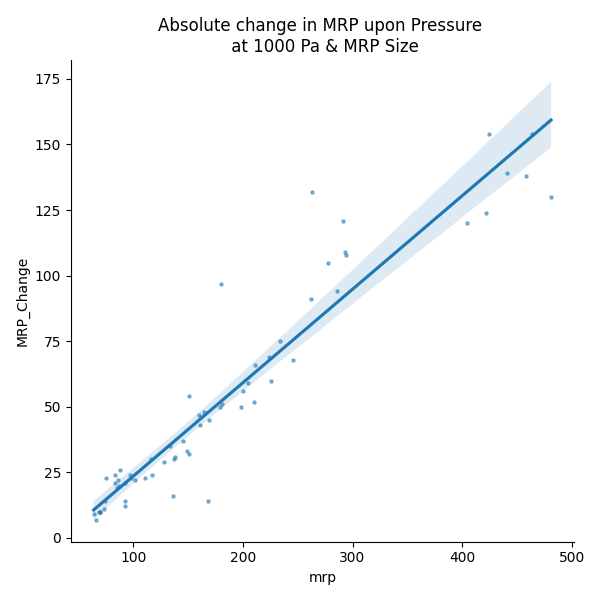

In [26]:
g = sns.lmplot(x='mrp', y='MRP_Change',data=df5, height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.fig.subplots_adjust(top=0.9)
plt.title('Absolute change in MRP upon Pressure \n at 1000 Pa & MRP Size')
plt.show()

In [27]:
df6 =df5[df5['np_type'] == 'NP100']

In [28]:
df6.head(10)

,Sanitised pore id,source_file,np_type,Pressure,mrp,MRP_Change,current_47mm_nA,rms_noise_47mm_pA,voltage_47mm_V,particle_rate_47mm_/min,...,asymmetry_50_std,asymmetry_50_median,asymmetry_50_skewness,asymmetry_50_kurtosis,prominence_mean,prominence_std,prominence_median,prominence_skewness,prominence_kurtosis,MRP_Percent_Change
3,A81095,2022\March\MRP Week 12.csv,NP100,0.0,88.0,26.0,127.0,7.1,0.60,512.0,...,0.639091,2.369119,0.760027,0.183484,0.241638,0.035424,0.241219,0.019916,-0.506888,29.545455
4,A81115,2022\March\MRP Week 13.csv,NP100,0.0,93.0,21.0,135.0,8.8,0.90,726.3,...,0.518151,1.938346,0.660083,0.952682,0.230708,0.037300,0.226143,0.547115,0.549276,22.580645
7,A81096,2022\March\MRP Week 12.csv,NP100,0.0,83.0,21.0,133.0,7.4,0.60,426.2,...,0.463358,1.792577,0.686269,0.165374,0.297442,0.051287,0.296982,0.135574,0.020520,25.301205
10,A81228,2022\March\MRP Week 13.csv,NP100,0.0,86.0,22.0,128.0,8.1,0.60,850.3,...,0.376488,1.660641,0.628491,0.368944,0.263091,0.035548,0.262924,0.179472,-0.113128,25.581395
13,A81229,2022\March\MRP Week 13.csv,NP100,0.0,85.0,19.0,127.0,7.5,0.68,443.8,...,0.486933,2.012309,0.754253,0.944852,0.268323,0.041892,0.265192,0.266708,0.048572,22.352941
14,A81092,2022\March\MRP Week 12.csv,NP100,0.0,75.0,23.0,123.0,7.8,0.70,647.1,...,0.444188,1.505454,0.585926,0.582094,0.372965,0.050683,0.379763,-0.335792,-0.162172,30.666667
17,A81154,2022\March\MRP Week 13.csv,NP100,0.0,87.0,20.0,130.0,8.2,1.10,782.8,...,0.567794,2.492857,0.670205,0.220968,0.249504,0.037933,0.251060,0.014274,0.198964,22.988506
18,A81093,2022\March\MRP Week 12.csv,NP100,0.0,83.0,24.0,127.0,7.0,0.60,443.6,...,0.530270,2.041749,0.957793,1.233410,0.282736,0.042955,0.281830,0.045212,-0.487847,28.915663
22,A81111,2022\March\MRP Week 13.csv,NP100,0.0,93.0,14.0,129.0,8.9,0.90,898.9,...,0.544626,1.657410,0.425240,0.357903,0.223186,0.034298,0.218880,0.499287,0.479414,15.053763


In [29]:
NP100 = df3[df3['np_type'] == 'NP100']

<IPython.core.display.Javascript object>


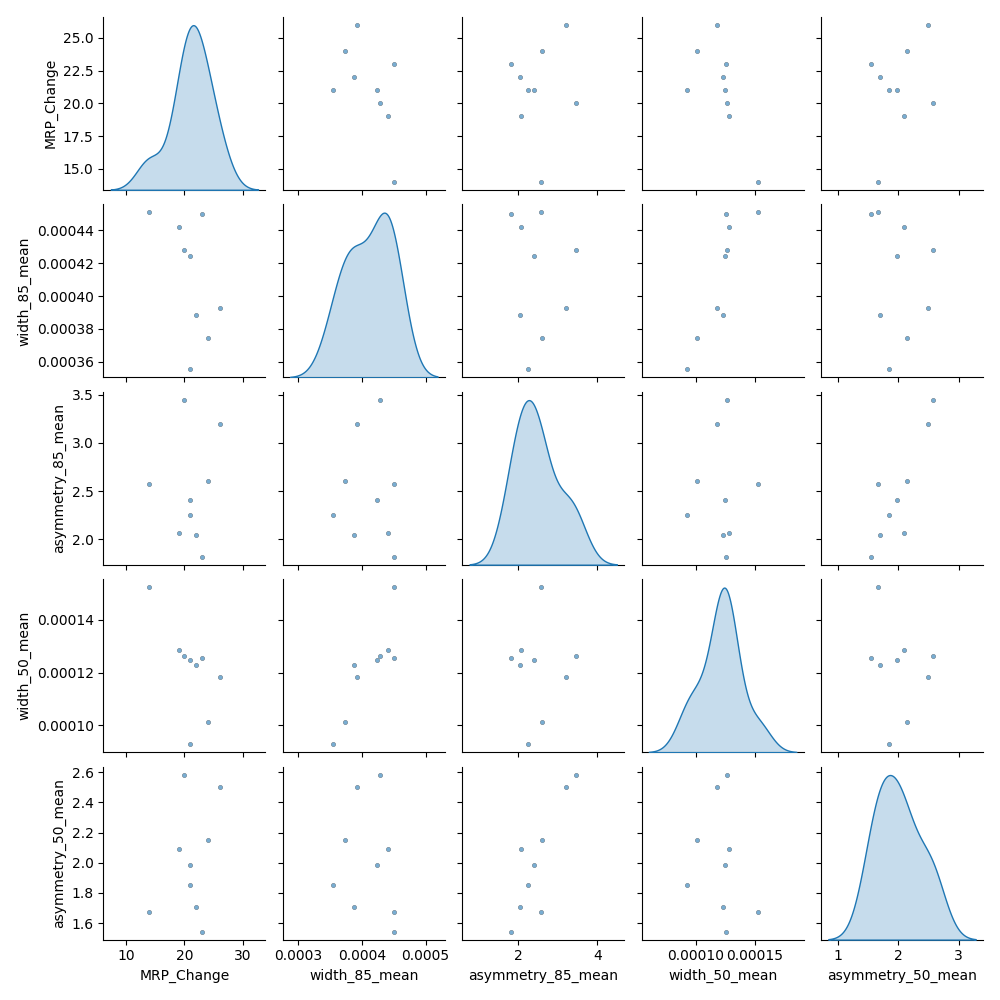

In [30]:
sns.pairplot(NP100[NP100['Pressure'] == 0], 
             vars = ['MRP_Change', 'width_85_mean', 'asymmetry_85_mean', 'width_50_mean',  'asymmetry_50_mean'],
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

<IPython.core.display.Javascript object>


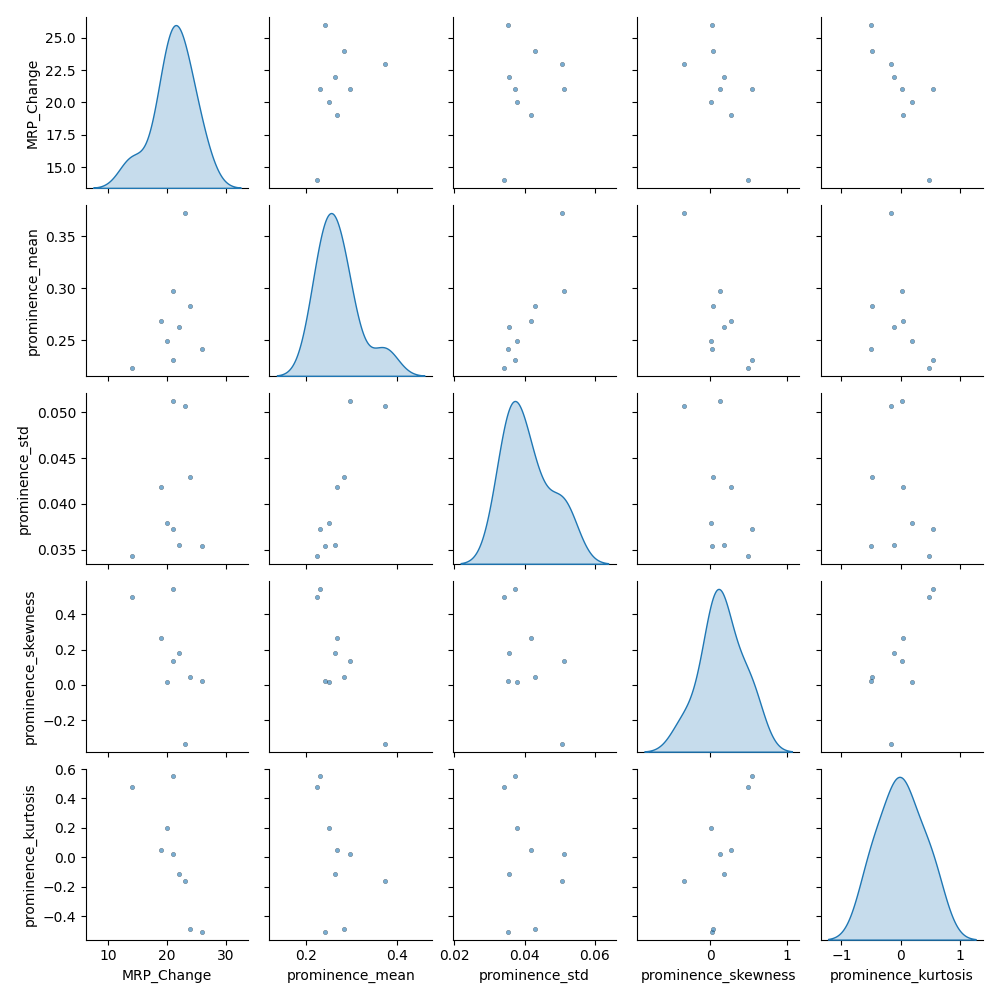

In [31]:
sns.pairplot(NP100[NP100['Pressure'] == 0], 
             vars = ['MRP_Change', 'prominence_mean', 'prominence_std', 'prominence_skewness',  'prominence_kurtosis'],
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2);

In [33]:
df7=df3.loc[df3['np_type'].isin(['NP100', 'NP150', 'NP200'])]

<IPython.core.display.Javascript object>


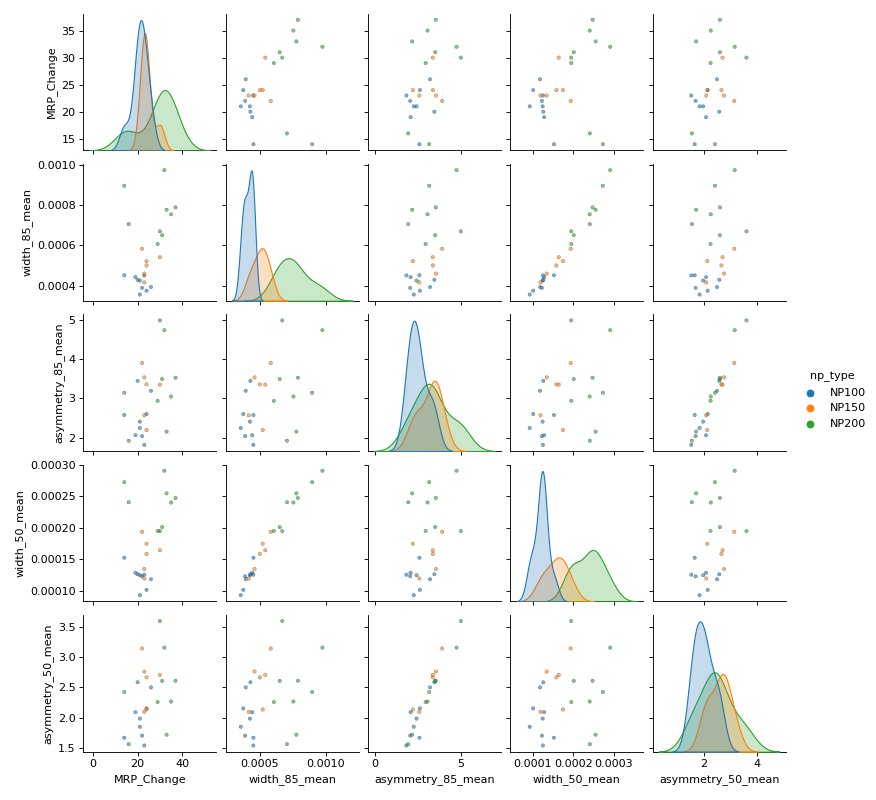

In [34]:
sns.pairplot(df7[df7['Pressure'] == 0], 
             vars = ['MRP_Change', 'width_85_mean', 'asymmetry_85_mean', 'width_50_mean',  'asymmetry_50_mean'],
             hue='np_type',
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'},
             height = 2)
plt.savefig('Pressure_0.png');

<IPython.core.display.Javascript object>


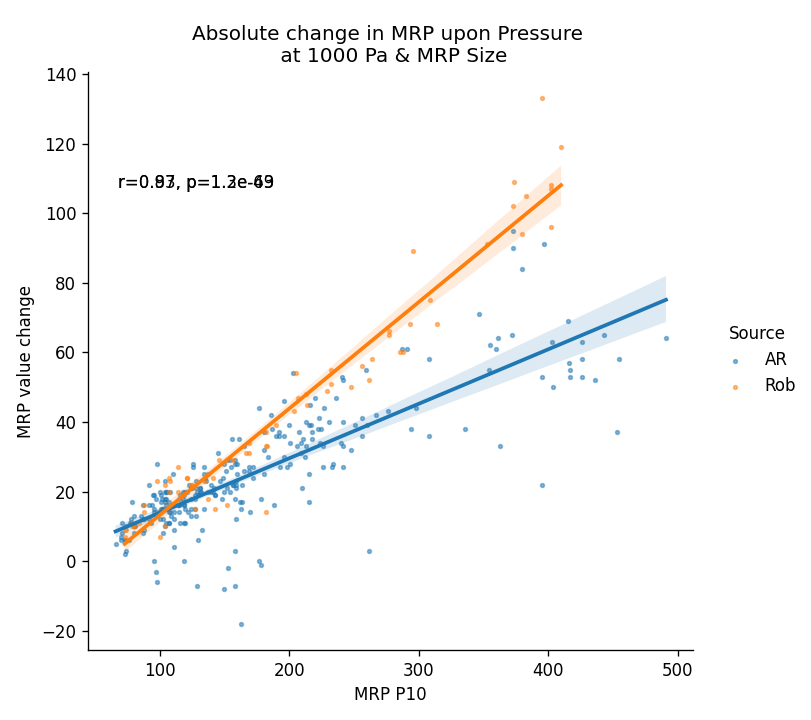

In [69]:
g = sns.lmplot(x='MRP P10', y='MRP value change',data=df2, hue='Source', height=6, aspect=1, scatter_kws={"s": 5, 'alpha':0.5})
   
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.9)
plt.title('Absolute change in MRP upon Pressure \n at 1000 Pa & MRP Size')
plt.show()

In [46]:
df5 = pd.read_csv(r'C:\Users\RufusTurner\Documents\Python Scripts\Python Scripts\Continuous Improvement\Apr 2022\MRP with P0 and P10 Combined_v2.csv')

In [36]:
db = pd.read_csv(r'C:\Users\RufusTurner\Documents\Python Scripts\Python Scripts\Continuous Improvement\Apr 2022\MRP_table_2021-12-22_corrected_g.csv')

C:\Users\RufusTurner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10,12,22,27,28,29,30,37,38,41,42,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
Combo = pd.merge(df5,db, on= "pore_serial_number", how="inner")

In [50]:
Combo.columns

Index(['S_N', 'pore_serial_number', 'Type P0', 'MRP P0', 'Type P10', 'MRP P10',
       'Change in type & size', 'MRP value change', 'Percent_Change', 'Source',
       'source_file', 'needle_id', 'penetration_date', 'mrp_measurement_date',
       'rig_id', 'user_initials', 'np_type', 'mrp', 'current_47mm_nA',
       'rms_noise_47mm_pA', 'voltage_47mm_V', 'particle_rate_47mm_/min',
       'dI_47mm_nA', 'particle_diameter_nm', 'g_at_47mm_nS', 'mrp_47mm_nm',
       'dI/I_47mm', '45/47_factor', 'current_45mm_0Pa_nA',
       'particle_rate_45mm_0Pa_/min', 'dI_45mm_0Pa_nA', 'dI/I_45mm_0Pa',
       'current_45mm_100Pa_nA', 'particle_rate_45mm_100Pa_/min',
       'dI_45mm_100Pa_nA', 'dI/I_45mm_100Pa', 'current_45mm_500Pa_nA',
       'particle_rate_45mm_500Pa_/min', 'dI_45mm_500Pa_nA',
       'current_47mm_0Pa_nA', 'particle_rate_47mm_0Pa_/min', 'dI_47mm_0Pa_nA',
       'current_47mm_100Pa_nA', 'particle_rate_47mm_100Pa_/min',
       'dI_47mm_100Pa_nA', 'dI/I_47mm_100Pa', 'current_47mm_500Pa_nA'

In [57]:
df6 = Combo[['pore_serial_number', 'Type P0', 'MRP P0', 'Type P10', 'MRP P10','MRP value change', 'Percent_Change','mrp', 'current_47mm_nA', 'voltage_47mm_V', 'particle_rate_47mm_/min',
       'dI_47mm_nA', 'particle_diameter_nm', 'g_at_47mm_nS', 'mrp_47mm_nm',
       'dI/I_47mm', '45/47_factor']]

In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 367
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pore_serial_number       368 non-null    object 
 1   Type P0                  368 non-null    object 
 2   MRP P0                   368 non-null    int64  
 3   Type P10                 368 non-null    object 
 4   MRP P10                  368 non-null    int64  
 5   MRP value change         368 non-null    int64  
 6   Percent_Change           368 non-null    object 
 7   mrp                      368 non-null    object 
 8   current_47mm_nA          368 non-null    float64
 9   voltage_47mm_V           368 non-null    float64
 10  particle_rate_47mm_/min  368 non-null    object 
 11  dI_47mm_nA               368 non-null    float64
 12  particle_diameter_nm     368 non-null    float64
 13  g_at_47mm_nS             368 non-null    float64
 14  mrp_47mm_nm              3

In [64]:
df6['%Change'] = df6['MRP value change']/df6['MRP P0'] *100
df6['mrp'] = df6['mrp'].astype(float)
df6['particle_rate_47mm_/min'] = df6['particle_rate_47mm_/min'].astype(float)

C:\Users\RUFUST~1\AppData\Local\Temp/ipykernel_38816/2774136604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['%Change'] = df6['MRP value change']/df6['MRP P0'] *100
C:\Users\RUFUST~1\AppData\Local\Temp/ipykernel_38816/2774136604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['mrp'] = df6['mrp'].astype(float)
C:\Users\RUFUST~1\AppData\Local\Temp/ipykernel_38816/2774136604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [65]:
df6.head()

,pore_serial_number,Type P0,MRP P0,Type P10,MRP P10,MRP value change,Percent_Change,mrp,current_47mm_nA,voltage_47mm_V,particle_rate_47mm_/min,dI_47mm_nA,particle_diameter_nm,g_at_47mm_nS,mrp_47mm_nm,dI/I_47mm,45/47_factor,%Change
0,A67190,NP200,181,NP200,163,-18,-9.82%,163.0,134.0,0.68,2971.1,0.406,205.0,196.0,204.0,0.003,1.25,-9.944751
1,A67230,ZP100,104,NP100,98,-6,-5.92%,98.0,126.0,0.56,1868.3,1.712,205.0,225.0,124.0,0.014,1.26,-5.769231
2,A67152,NP150,136,NP150,129,-7,-5.42%,129.0,133.0,0.48,1097.5,0.823,205.0,277.0,161.0,0.006,1.25,-5.147059
3,A67148,ZP200,158,NP200,150,-8,-4.90%,150.0,133.0,0.52,2962.0,0.521,205.0,256.0,188.0,0.004,1.25,-5.063291
4,A67159,NP200,165,NP200,158,-7,-4.15%,158.0,135.0,0.46,3142.6,0.452,205.0,293.0,197.0,0.003,1.25,-4.242424


In [75]:
h=sns.scatterplot(x = df6['mrp'], y = df6['mrp_47mm_nm'])
h.fig.subplots_adjust(top=0.9)
plt.title("% Change in MRP Values at 1000 Pa cf 0 Pa \n in Angela/Rebecca and Rob Data ");

AttributeError: 'AxesSubplot' object has no attribute 'fig'